| **Inicio** | **atrás 3** | **Siguiente 5** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./03_Probabilidad.ipynb)| [⏩](./05_Intervalos_de_Confianza.ipynb)|

# **04 Aproximación normal para datos y distribución binomial**

Este módulo abarca la regresión, posiblemente la técnica estadística más importante por su versatilidad para resolver distintos tipos de problemas estadísticos. Aprenderá acerca de la inferencia, la regresión y cómo realizar diagnósticos de regresión.

## **4.1 La predicción es una tarea clave de la estadística**

La predicción en estadística se refiere al uso de datos existentes para estimar o prever valores futuros o desconocidos de una variable de interés. Es una tarea clave en muchos campos como la economía, la biología, la ingeniería y más, permitiendo a los investigadores y profesionales tomar decisiones informadas basadas en modelos estadísticos.

**Métodos de Predicción**

Hay varios métodos estadísticos para realizar predicciones, dependiendo de la naturaleza de los datos y el objetivo de la predicción. Algunos de los métodos más comunes incluyen:

1. **Regresión Lineal**: Usada para predecir una variable continua a partir de una o más variables independientes. La relación entre la variable dependiente y las independientes se asume lineal.

   - **Fórmula de la Regresión Lineal Simple**:

   $Y = \beta_0 + \beta_1X + \epsilon$

     - $(Y)$ es la variable dependiente que queremos predecir.
     - $(X)$ es la variable independiente.
     - $(\beta_0)$ es el intercepto.
     - $(\beta_1)$ es la pendiente.
     - $(\epsilon)$ es el término de error.

2. **Regresión Polinomial**: Una extensión de la regresión lineal donde se modela una relación no lineal entre la variable independiente y la variable dependiente.

3. **Modelos de Series Temporales**: Como ARIMA, utilizados para predecir valores futuros basándose en datos históricos, especialmente útiles en finanzas y meteorología.

**Ejemplo con Regresión Lineal**

Para ilustrar cómo se utiliza la estadística para hacer predicciones, crearemos un conjunto de datos simulado que represente, por ejemplo, las ventas anuales de una empresa en función de su presupuesto de publicidad. Usaremos la regresión lineal para predecir las ventas basadas en diferentes niveles de gasto en publicidad.

Primero, generaremos un DataFrame con los datos simulados. Luego, ajustaremos un modelo de regresión lineal a estos datos y haremos algunas predicciones. Finalmente, visualizaremos los datos junto con la línea de regresión ajustada.

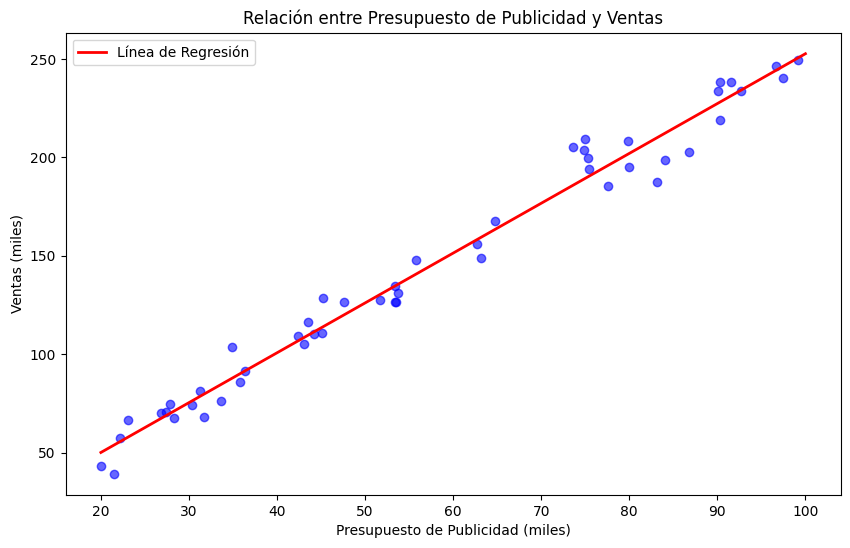

In [3]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulando datos
np.random.seed(1)
presupuesto_publicidad = np.random.uniform(20, 100, 50)
ventas = 2.5 * presupuesto_publicidad + np.random.normal(0, 10, 50)

# Creando un DataFrame
df_ventas = pd.DataFrame({'Presupuesto Publicidad': presupuesto_publicidad, 'Ventas': ventas})

# Instanciando y ajustando el modelo
modelo = LinearRegression()
modelo.fit(df_ventas[['Presupuesto Publicidad']], df_ventas['Ventas'])  # Asegúrate de usar DataFrame aquí

# Creando valores para la predicción (línea de regresión) usando DataFrame
X_pred = pd.DataFrame({'Presupuesto Publicidad': np.linspace(20, 100, 100)})
Y_pred = modelo.predict(X_pred)  # Pasar un DataFrame similar al usado en el fit

# Graficando
plt.figure(figsize=(10, 6))
plt.scatter(df_ventas['Presupuesto Publicidad'], df_ventas['Ventas'], color='blue', alpha=0.6)
plt.plot(X_pred, Y_pred, color='red', linewidth=2, label='Línea de Regresión')
plt.title('Relación entre Presupuesto de Publicidad y Ventas')
plt.xlabel('Presupuesto de Publicidad (miles)')
plt.ylabel('Ventas (miles)')
plt.legend()
plt.show()

El gráfico muestra la relación entre el presupuesto de publicidad (en miles) y las ventas (también en miles), junto con la línea de regresión lineal ajustada. Según el modelo de regresión lineal, hay una relación positiva entre el presupuesto de publicidad y las ventas: a medida que aumenta el presupuesto de publicidad, también lo hacen las ventas.

Los coeficientes del modelo indican que la ecuación de la línea de regresión es aproximadamente:

$Ventas = -0.67 + 2.53 \times (Presupuesto\ de\ Publicidad)$

Esto significa que, por cada mil unidades adicionales gastadas en publicidad, se espera, en promedio, un aumento de aproximadamente 2.53 mil unidades en ventas, considerando el modelo lineal ajustado a estos datos.

Este enfoque se puede aplicar a diversas situaciones donde se busca entender la relación entre variables y hacer predicciones. La regresión lineal es una herramienta fundamental en estadística para este propósito, ofreciendo un método sencillo y efectivo para predecir valores continuos.

## **4.2 El coeficiente de correlación**

El coeficiente de correlación es una medida estadística que calcula la relación o la asociación lineal entre dos variables. Los más utilizados son el coeficiente de correlación de Pearson, Spearman y Kendall. El coeficiente de Pearson es el más común, y mide el grado de relación lineal entre dos variables cuantitativas. Su valor siempre se encuentra en el rango de -1 a 1, donde:

- **1** indica una correlación positiva perfecta: si una variable aumenta, la otra también lo hace en proporción constante.
- **-1** indica una correlación negativa perfecta: si una variable aumenta, la otra disminuye en proporción constante.
- **0** indica que no hay correlación lineal entre las variables.

**Fórmula del Coeficiente de Correlación de Pearson**

El coeficiente de correlación de Pearson $(r)$ se calcula como:

$r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}}$

Donde:

- $(x_i)$ y $(y_i)$ son los valores individuales de las variables $(X)$ e $(Y)$,
- $(\bar{x})$ y $(\bar{y})$ son las medias de $(X)$ e $(Y)$,
- $(n)$ es el número de observaciones.

**Ejemplo Aritmético**

Si tenemos dos variables $(X)$ e $(Y)$ con 5 observaciones cada una:

- $X = [1, 2, 3, 4, 5]$
- $Y = [2, 3, 4, 5, 6]$

Podemos calcular su coeficiente de correlación de Pearson para entender la relación entre ellas.

**Implementación en Código y Gráficos**

Primero, crearemos un DataFrame con estas variables. Luego, calcularémos el coeficiente de correlación de Pearson entre ellas y visualizaremos la relación con un gráfico de dispersión.

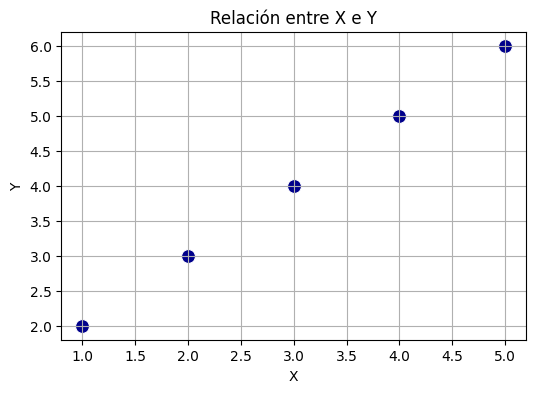

,X,Y
X,1.0,1.0
Y,1.0,1.0


In [4]:
# Creando el DataFrame
X = [1, 2, 3, 4, 5]
Y = [2, 3, 4, 5, 6]
df_ejemplo = pd.DataFrame({'X': X, 'Y': Y})

# Calculando el coeficiente de correlación de Pearson
coeficiente_pearson = df_ejemplo.corr(method='pearson')

# Gráfico de dispersión
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_ejemplo, x='X', y='Y', s=100, color='darkblue')
plt.title('Relación entre X e Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

# Mostrando el coeficiente de correlación
coeficiente_pearson

El gráfico de dispersión muestra una relación lineal perfecta entre las variables $(X)$ e $(Y)$, lo que se refleja en el coeficiente de correlación de Pearson de **1.0**. Esto indica una correlación positiva perfecta: a medida que $(X)$ aumenta, $(Y)$ también lo hace en una proporción constante.

El coeficiente de correlación de 1.0 confirma que, para este conjunto de datos específico, existe una relación directa y perfectamente lineal entre las dos variables. En la práctica, encontrar una correlación perfecta de 1.0 o -1.0 es raro cuando se trabaja con datos reales, ya que la mayoría de las relaciones naturales contienen algún grado de variabilidad o ruido.

## **4.3 Medidas de correlación Asociación lineal**

Las medidas de correlación de asociación lineal cuantifican el grado y la dirección de la relación lineal entre dos variables cuantitativas. Estas medidas son esenciales en estadística para determinar cuán fuertemente están relacionadas dos variables y en qué dirección se mueve esa relación (positiva o negativamente). La más conocida y utilizada es el coeficiente de correlación de Pearson, pero existen otras medidas importantes, como el coeficiente de correlación de Spearman para datos no paramétricos y la covarianza como medida de la asociación lineal.

**1. Coeficiente de Correlación de Pearson**

Es una medida de la correlación lineal entre dos variables cuantitativas. Su valor varía entre -1 y 1, donde 1 indica una correlación positiva perfecta, -1 una correlación negativa perfecta, y 0 ninguna correlación lineal.

**Fórmula:**

$r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2\sum (y_i - \bar{y})^2}}$

**2. Coeficiente de Correlación de Spearman**

Es una medida de correlación no paramétrica que evalúa la relación monótona entre dos variables continuas o ordinales. A diferencia de Pearson, Spearman puede capturar relaciones no lineales.

**Fórmula:**

$\rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}$

Donde $(d_i)$ es la diferencia entre los rangos de cada observación de las dos variables, y $(n)$ es el número de observaciones.

**3. Covarianza**

La covarianza mide cómo dos variables se mueven juntas. Sin embargo, su magnitud no está normalizada, por lo que es difícil interpretar la fuerza de la relación.

**Fórmula:**

$\text{Cov}(X, Y) = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{n-1}$

**Ejemplo con Datos Simulados**

Generaremos un conjunto de datos simulado para calcular y visualizar estas medidas de correlación. Supongamos que tenemos datos sobre las horas estudiadas y las calificaciones obtenidas por un grupo de estudiantes.

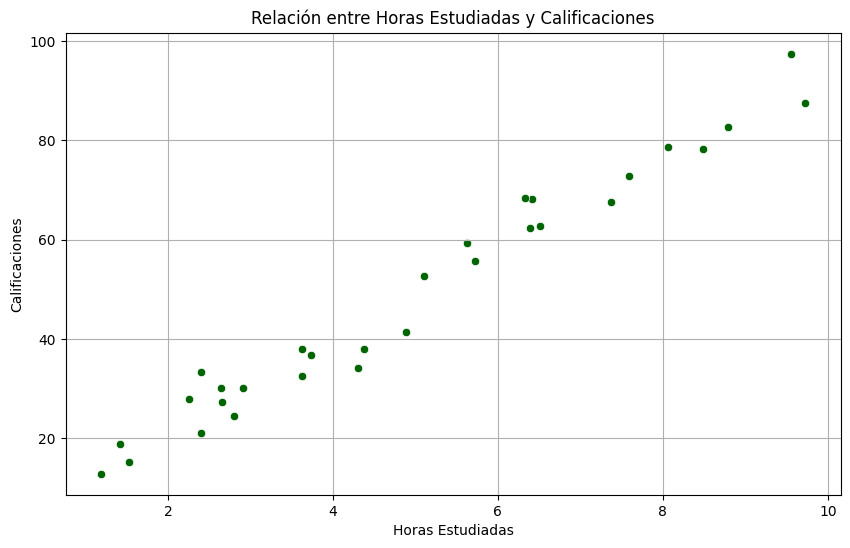

(0.9845698147185035, 0.9733036707452726, 59.601079676089455)

In [5]:
# Generando datos simulados
np.random.seed(42)
horas_estudiadas = np.random.uniform(1, 10, 30)  # Horas estudiadas
calificaciones = horas_estudiadas * 10 + np.random.normal(0, 5, 30)  # Calificaciones obtenidas

# Creando un DataFrame
df_estudiantes = pd.DataFrame({'Horas Estudiadas': horas_estudiadas, 'Calificaciones': calificaciones})

# Calculando coeficientes de correlación
pearson_corr = df_estudiantes.corr(method='pearson').iloc[0,1]
spearman_corr = df_estudiantes.corr(method='spearman').iloc[0,1]
covarianza = df_estudiantes.cov().iloc[0,1]

# Gráfico de dispersión para visualizar la relación
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_estudiantes, x='Horas Estudiadas', y='Calificaciones', color='darkgreen')
plt.title('Relación entre Horas Estudiadas y Calificaciones')
plt.xlabel('Horas Estudiadas')
plt.ylabel('Calificaciones')
plt.grid(True)
plt.show()

(pearson_corr, spearman_corr, covarianza)

El gráfico muestra una clara relación positiva entre las horas estudiadas y las calificaciones obtenidas por los estudiantes, indicando que, en general, a más horas de estudio, mejores son las calificaciones.

Los cálculos de las medidas de correlación para estos datos son:

- **Coeficiente de Correlación de Pearson:** 0.985, lo que indica una fuerte correlación lineal positiva entre las horas estudiadas y las calificaciones.
- **Coeficiente de Correlación de Spearman:** 0.973, también señalando una fuerte relación monótona entre las dos variables. Este valor cercano al coeficiente de Pearson sugiere que la relación es no solo fuerte sino también bastante lineal.
- **Covarianza:** 59.60, que indica una relación positiva entre las variables. Sin embargo, dado que la covarianza depende de las unidades de medida de las variables, su valor es más difícil de interpretar sin contexto adicional.

Estos resultados subrayan la utilidad de las medidas de correlación para evaluar la relación entre variables. Mientras que Pearson y Spearman proporcionan un resumen numérico de la fuerza y dirección de esta relación (normalizada entre -1 y 1), la covarianza ofrece una medida más cruda que puede ser útil para entender cómo las variables varían juntas en sus unidades originales.

## **4.4 Línea de regresión y método de los mínimos cuadrados**

La línea de regresión es una herramienta estadística utilizada para describir la relación entre una variable dependiente $(Y)$ y una o más variables independientes $(X)$. En el caso de la regresión lineal simple, donde solo hay una variable independiente, la línea de regresión modela la relación con una ecuación de la forma:

$Y = \beta_0 + \beta_1X + \epsilon$

donde:

- $(Y)$ es la variable dependiente que queremos predecir,
- $(X)$ es la variable independiente,
- $(\beta_0)$ es el intercepto con el eje $(Y)$,
- $(\beta_1)$ es la pendiente de la línea de regresión, que indica cómo cambia $(Y)$ con una unidad de cambio en $(X)$,
- $(\epsilon)$ es el término de error que captura la variabilidad en $(Y)$ que no se explica por $(X)$.

El método de los mínimos cuadrados es un enfoque para encontrar los valores óptimos de $(\beta_0)$ y $(\beta_1)$ que minimizan la suma de los cuadrados de las diferencias entre los valores observados de $(Y)$ y los valores predichos por el modelo de regresión. Las fórmulas para calcular $(\beta_0)$ y $(\beta_1)$ son:

$\beta_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$

$\beta_0 = \bar{y} - \beta_1\bar{x}$

donde $(\bar{x})$ y $(\bar{y})$ son las medias de las variables $(X)$ e $(Y)$, respectivamente.

**Ejemplo con Datos Simulados**

Para ilustrar cómo funciona la regresión lineal y el método de los mínimos cuadrados, generaremos un conjunto de datos simulado que represente, por ejemplo, el rendimiento de estudiantes (calificaciones) basado en el número de horas estudiadas.

Luego, ajustaremos un modelo de regresión lineal a estos datos, calcularemos $(\beta_0)$ y $(\beta_1)$ utilizando el método de los mínimos cuadrados, y visualizaremos la línea de regresión.

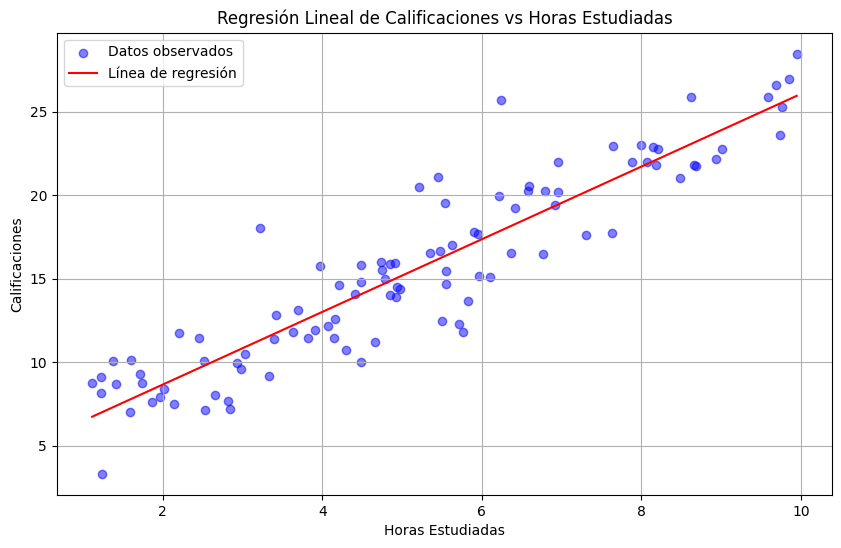

(4.305405445484579, 2.176716888533691)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generando datos simulados
np.random.seed(2)  # Semilla para reproducibilidad
horas = np.random.uniform(1, 10, 100)  # Horas estudiadas
calificaciones = 5 + 2*horas + np.random.normal(0, 2, 100)  # Calificaciones

# Creando DataFrame
df = pd.DataFrame({'Horas Estudiadas': horas, 'Calificaciones': calificaciones})

# Ajuste de un modelo de regresión lineal
modelo_lr = LinearRegression()
modelo_lr.fit(df[['Horas Estudiadas']], df['Calificaciones'])

# Coeficientes obtenidos
beta_0 = modelo_lr.intercept_
beta_1 = modelo_lr.coef_[0]

# Predicciones para la línea de regresión
horas_pred_df = pd.DataFrame({'Horas Estudiadas': np.linspace(horas.min(), horas.max(), 100)})  # Convertir a DataFrame
calificaciones_pred = modelo_lr.predict(horas_pred_df)

# Gráfico de dispersión y línea de regresión
plt.figure(figsize=(10, 6))
plt.scatter(df['Horas Estudiadas'], df['Calificaciones'], color='blue', alpha=0.5, label='Datos observados')
plt.plot(horas_pred_df['Horas Estudiadas'], calificaciones_pred, color='red', label='Línea de regresión')
plt.title('Regresión Lineal de Calificaciones vs Horas Estudiadas')
plt.xlabel('Horas Estudiadas')
plt.ylabel('Calificaciones')
plt.legend()
plt.grid(True)
plt.show()

(beta_0, beta_1)

La línea de regresión ajustada, representada en rojo, muestra la relación entre las horas estudiadas y las calificaciones obtenidas por los estudiantes. Basándonos en el modelo de regresión lineal ajustado mediante el método de los mínimos cuadrados, los coeficientes obtenidos son:

- Intercepto $(\beta_0)$: aproximadamente 4.31, lo que indica el valor esperado de las calificaciones cuando el número de horas estudiadas es 0.
- Pendiente $(\beta_1)$: aproximadamente 2.18, lo que significa que por cada hora adicional de estudio, se espera que la calificación de un estudiante aumente en promedio 2.18 puntos, asumiendo una relación lineal entre las horas estudiadas y las calificaciones.

Este ejemplo ilustra cómo la regresión lineal y el método de los mínimos cuadrados pueden ser utilizados para entender y predecir la relación entre una variable dependiente y una independiente. La línea de regresión ajustada proporciona una visualización clara de esta relación y permite hacer predicciones sobre el valor esperado de la variable dependiente dada una cierta cantidad de la variable independiente.

## **4.5 Regresión a la media, La falacia de la regresión**

**Regresión a la Media**

La regresión a la media es un fenómeno estadístico según el cual, si una variable es extrema en su primera medición, tenderá a estar más cerca de la media en la siguiente medición. Y, si es extrema en la segunda medición, tendía a haber estado más cerca de la media en su primera medición. Esto no implica un proceso físico o causal, sino que es una consecuencia de la variabilidad aleatoria y la selección de muestras extremas.

Este fenómeno se debe tener en cuenta al interpretar correlaciones en situaciones donde las variables pueden fluctuar de manera aleatoria, como en el rendimiento deportivo, resultados de exámenes, entre otros. Sin entender la regresión a la media, se pueden hacer interpretaciones erróneas sobre el efecto de cambios en políticas, tratamientos médicos, o cualquier otra intervención.

**La Falacia de la Regresión**

La falacia de la regresión, también conocida como falacia de la regresión a la media, ocurre cuando se ignora el fenómeno de la regresión a la media y se atribuyen efectos causales a eventos que en realidad son resultado de fluctuaciones aleatorias. Por ejemplo, si un estudiante obtiene una calificación extremadamente alta o baja en un examen y luego regresa a sus calificaciones promedio en el próximo, atribuir ese cambio a factores como el esfuerzo o la dificultad del examen sería caer en la falacia de la regresión.

**Ejemplo en Datos**

Para ilustrar la regresión a la media, podemos simular un conjunto de datos donde medimos la misma variable dos veces (por ejemplo, el rendimiento de estudiantes en dos exámenes consecutivos). Veremos cómo aquellos que tienen un rendimiento extremadamente alto o bajo en el primer examen tienden a tener un rendimiento más cercano a la media en el segundo.

Crearemos un DataFrame para este propósito y luego visualizaremos ambos conjuntos de rendimientos para observar la regresión a la media.

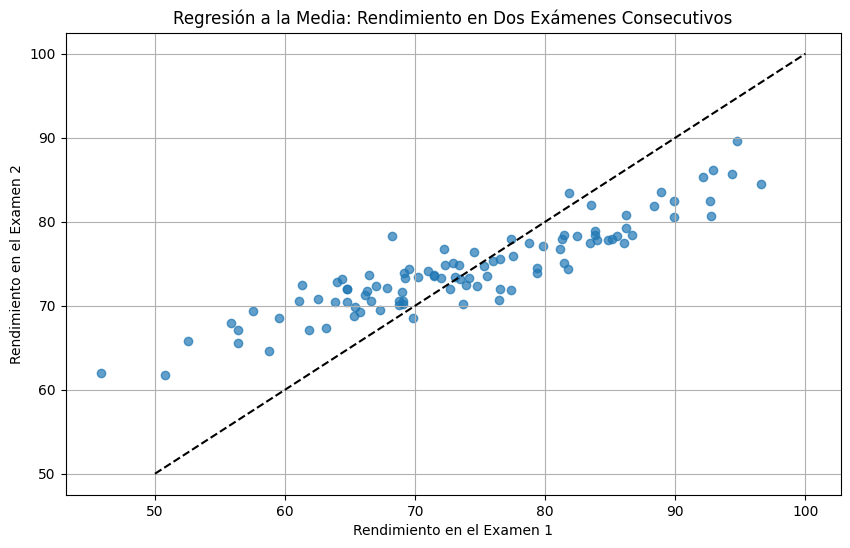

0.9130434190064287

In [7]:
# Generando datos simulados para el ejemplo
np.random.seed(3)  # Para resultados reproducibles
n_estudiantes = 100

# Rendimiento en el primer examen (media = 75, desviación estándar = 10)
rendimiento_1 = np.random.normal(75, 10, n_estudiantes)

# Rendimiento en el segundo examen: incorporamos la regresión a la media añadiendo ruido
rendimiento_2 = rendimiento_1 * 0.5 + np.random.normal(75, 5, n_estudiantes) * 0.5

# Creando DataFrame
df_rendimiento = pd.DataFrame({'Examen 1': rendimiento_1, 'Examen 2': rendimiento_2})

# Calculando la correlación entre los rendimientos de los dos exámenes
correlacion_examenes = df_rendimiento.corr().iloc[0, 1]

# Gráfico de dispersión para visualizar la regresión a la media
plt.figure(figsize=(10, 6))
plt.scatter(df_rendimiento['Examen 1'], df_rendimiento['Examen 2'], alpha=0.7)
plt.title('Regresión a la Media: Rendimiento en Dos Exámenes Consecutivos')
plt.xlabel('Rendimiento en el Examen 1')
plt.ylabel('Rendimiento en el Examen 2')
plt.plot([50, 100], [50, 100], 'k--')  # Línea de igual rendimiento para referencia
plt.grid(True)
plt.show()

correlacion_examenes

El gráfico muestra la relación entre los rendimientos de los estudiantes en dos exámenes consecutivos. La línea discontinua representa el lugar donde el rendimiento en ambos exámenes sería igual. Puedes observar cómo los puntos tienden a acercarse a esta línea, lo que indica la regresión a la media: estudiantes que tuvieron un rendimiento extremadamente alto o bajo en el primer examen tienden a tener resultados más cercanos a la media en el segundo examen.

La correlación entre los rendimientos en los dos exámenes es aproximadamente 0.91, lo que indica una fuerte relación lineal. Sin embargo, este fenómeno también ilustra cómo la variabilidad aleatoria puede hacer que las observaciones extremas se "regresen" hacia la media en mediciones sucesivas, un reflejo claro de la regresión a la media.

Este ejemplo subraya la importancia de ser cauteloso al interpretar cambios en datos secuenciales, especialmente cuando se observan mejoras o declives después de resultados extremadamente buenos o malos. La regresión a la media sugiere que tales cambios no siempre son el resultado de factores externos o intervenciones, sino a menudo simplemente una parte natural de la variabilidad estadística.

## **4.6 Predecir $y$ a partir de $x$ y $x$ a partir de $y$**

Predecir $(y)$ a partir de $(x)$ y viceversa implica entender la relación entre dos variables y cómo una puede ser utilizada para predecir la otra. En el contexto de la regresión lineal, esto se traduce en ajustar un modelo que describa cómo la variable dependiente $(y)$ cambia con la variable independiente $(x)$, y también cómo $(x)$ puede ser estimado a partir de $(y)$ si la relación es lo suficientemente fuerte y clara.

**Predecir $(y)$ a partir de $(x)$**

Cuando se predice $(y)$ a partir de $(x)$, generalmente se ajusta un modelo de regresión lineal simple que tiene la forma:

$y = \beta_0 + \beta_1x + \epsilon$

Donde:

- $(y)$ es la variable dependiente,
- $(x)$ es la variable independiente,
- $(\beta_0)$ es el intercepto,
- $(\beta_1)$ es la pendiente de la línea, indicando el cambio en $(y)$ por una unidad de cambio en $(x)$,
- $(\epsilon)$ representa el error o la variabilidad en $(y)$ que no es explicada por $(x)$.

**Predecir $(x)$ a partir de $(y)$**

Para predecir $(x)$ a partir de $(y)$, conceptualmente invertimos el enfoque, tratando a $(y)$ como la variable independiente y a $(x)$ como la dependiente. Esto implica ajustar un modelo similar pero con las variables intercambiadas:

$x = \alpha_0 + \alpha_1y + \epsilon$

Donde:

- $(\alpha_0)$ y $(\alpha_1)$ son coeficientes para el modelo invertido, con $(\alpha_1 = 1/\beta_1)$ si suponemos una relación lineal perfecta sin error.

**Ejemplo con Datos Simulados**

Generaremos un conjunto de datos que represente, por ejemplo, la relación entre horas de estudio $(x)$ y puntuaciones de un examen $(y)$. Ajustaremos un modelo para predecir $(y)$ a partir de $(x)$ y luego otro para predecir $(x)$ a partir de $(y)$, y visualizaremos ambos modelos.

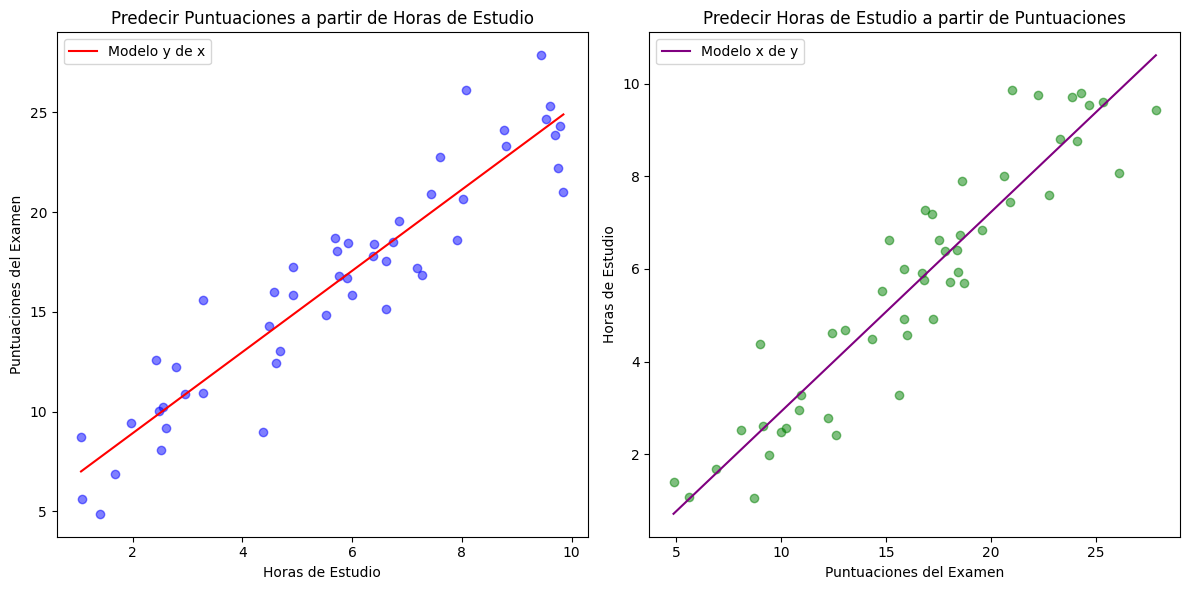

((4.85758813669535, 2.033792624429322),
 (-1.3920796240184972, 0.43089345394674433))

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# Semilla para reproducibilidad
np.random.seed(4)

# Generando datos simulados
x = np.random.uniform(1, 10, 50)  # Horas de estudio
y = 5 + 2*x + np.random.normal(0, 2, 50)  # Puntuaciones del examen

# Creando DataFrame
df = pd.DataFrame({'Horas de Estudio': x, 'Puntuaciones del Examen': y})

# Ajuste de modelos de regresión lineal
modelo_y_de_x = LinearRegression()
modelo_y_de_x.fit(df[['Horas de Estudio']], df['Puntuaciones del Examen'])

modelo_x_de_y = LinearRegression()
modelo_x_de_y.fit(df[['Puntuaciones del Examen']], df['Horas de Estudio'])

# Predicciones para la visualización
x_line = pd.DataFrame({'Horas de Estudio': np.linspace(x.min(), x.max(), 100)})  # Usar DataFrame aquí
y_pred_de_x = modelo_y_de_x.predict(x_line)

y_line = pd.DataFrame({'Puntuaciones del Examen': np.linspace(y.min(), y.max(), 100)})  # Usar DataFrame aquí
x_pred_de_y = modelo_x_de_y.predict(y_line)

# Gráfico de dispersión y líneas de regresión
plt.figure(figsize=(12, 6))

# Prediciendo y de x
plt.subplot(1, 2, 1)
plt.scatter(df['Horas de Estudio'], df['Puntuaciones del Examen'], color='blue', alpha=0.5)
plt.plot(x_line, y_pred_de_x, color='red', label='Modelo y de x')
plt.title('Predecir Puntuaciones a partir de Horas de Estudio')
plt.xlabel('Horas de Estudio')
plt.ylabel('Puntuaciones del Examen')
plt.legend()

# Prediciendo x de y
plt.subplot(1, 2, 2)
plt.scatter(df['Puntuaciones del Examen'], df['Horas de Estudio'], color='green', alpha=0.5)
plt.plot(y_line, x_pred_de_y, color='purple', label='Modelo x de y')
plt.title('Predecir Horas de Estudio a partir de Puntuaciones')
plt.xlabel('Puntuaciones del Examen')
plt.ylabel('Horas de Estudio')
plt.legend()

plt.tight_layout()
plt.show()

# Coeficientes de los modelos
(beta_0_y_de_x, beta_1_y_de_x) = (modelo_y_de_x.intercept_, modelo_y_de_x.coef_[0])
(alpha_0_x_de_y, alpha_1_x_de_y) = (modelo_x_de_y.intercept_, modelo_x_de_y.coef_[0])

(beta_0_y_de_x, beta_1_y_de_x), (alpha_0_x_de_y, alpha_1_x_de_y)

Los modelos de regresión ajustados muestran cómo se puede predecir $(y)$ a partir de $(x)$ y cómo $(x)$ puede ser estimado a partir de $(y)$, respectivamente.

- Para predecir las **Puntuaciones del Examen** $(y)$ a partir de las **Horas de Estudio** $(x)$, el modelo ajustado es:

  $y = 4.86 + 2.03x$

  Esto indica que se espera que las puntuaciones del examen aumenten en aproximadamente 2.03 puntos por cada hora adicional de estudio.

- Para predecir las **Horas de Estudio** $(x)$ a partir de las **Puntuaciones del Examen** $(y)$, el modelo ajustado es:

  $x = -1.39 + 0.43y$

  Aquí, el coeficiente positivo indica que a medida que aumentan las puntuaciones del examen, también se espera que aumenten las horas de estudio, aunque esta relación es menos directa debido a la naturaleza invertida del modelo.

Estos resultados ilustran cómo la regresión lineal puede ser aplicada tanto para predecir $(y)$ a partir de $(x)$ como para predecir $(x)$ a partir de $(y)$, ofreciendo una herramienta poderosa para analizar y entender las relaciones entre variables. La visualización proporciona una clara representación gráfica de ambas relaciones, destacando la capacidad predictiva de los modelos lineales ajustados.

## **4.7 Aproximación normal Dada $x$**

La **aproximación normal** es un concepto estadístico utilizado para estimar la distribución de diversas estadísticas de muestra cuando el tamaño de la muestra es lo suficientemente grande, basándose en el Teorema del Límite Central. Este teorema establece que, bajo ciertas condiciones, la distribución de la suma (o promedio) de un gran número de observaciones independientes y distribuidas idénticamente tiende a seguir una distribución normal, sin importar la forma de la distribución original de la población.

Una **aproximación normal** es particularmente útil para:

- Aproximar la distribución de sumas o medias de muestras grandes.
- Calcular probabilidades para binomiales y otras distribuciones cuando el cálculo exacto es complicado pero el tamaño de la muestra es grande.

**Fórmulas para la Aproximación Normal**

Cuando aplicamos la aproximación normal a la **distribución binomial**, por ejemplo, podemos usar las siguientes fórmulas para convertir una binomial $B(n, p)$ a una aproximación normal $N(\mu, \sigma^2)$ donde:

- $(\mu = np)$
- $(\sigma^2 = np(1-p))$

Y luego, para calcular probabilidades, podemos estandarizar con la fórmula:

$Z = \frac{X - \mu}{\sigma}$

**Ejemplo con Datos Simulados**

Supongamos que queremos aproximar la distribución de la cantidad de éxitos en 1000 lanzamientos de una moneda un experimento binomial con $(n = 1000)$ y $(p = 0.5)$ utilizando la aproximación normal. Calcularemos la probabilidad de obtener entre 450 y 550 caras inclusive, usando la aproximación normal para comparar con el resultado exacto de la binomial.

Primero, generemos la distribución binomial y luego apliquemos la aproximación normal para visualizar ambos en un gráfico.

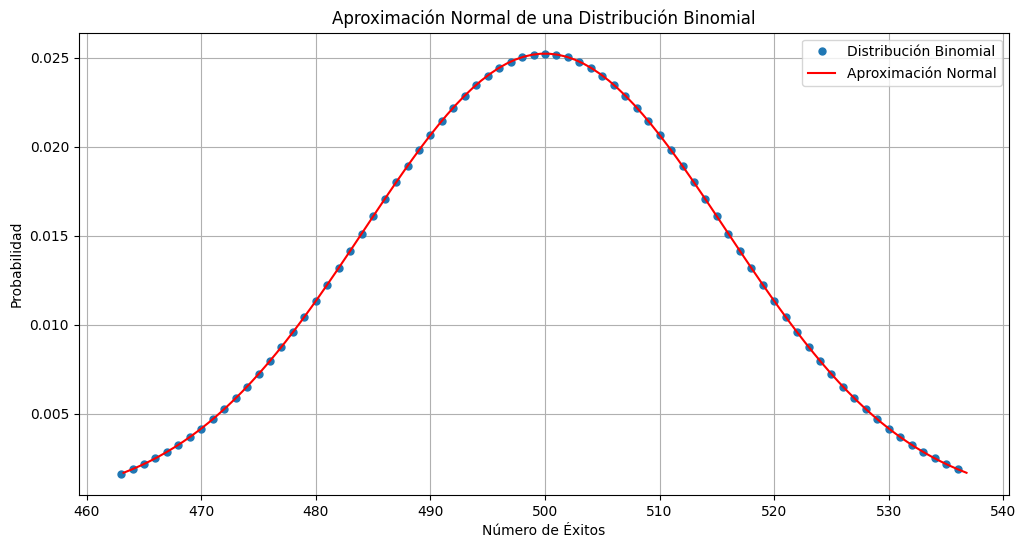

In [9]:
from scipy.stats import binom, norm

# Parámetros de la distribución binomial
n = 1000  # número de ensayos
p = 0.5   # probabilidad de éxito

# Parámetros para la aproximación normal
mu = n * p
sigma = np.sqrt(n * p * (1 - p))

# Generando la distribución binomial
x_binom = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
y_binom = binom.pmf(x_binom, n, p)

# Generando la aproximación normal
x_norm = np.linspace(norm.ppf(0.01, mu, sigma), norm.ppf(0.99, mu, sigma), 100)
y_norm = norm.pdf(x_norm, mu, sigma)

# Gráfico de la distribución binomial y su aproximación normal
plt.figure(figsize=(12, 6))
plt.plot(x_binom, y_binom, 'o', label='Distribución Binomial', markersize=5)
plt.plot(x_norm, y_norm, 'r-', label='Aproximación Normal')
plt.title('Aproximación Normal de una Distribución Binomial')
plt.xlabel('Número de Éxitos')
plt.ylabel('Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

El gráfico muestra la distribución binomial de la cantidad de éxitos en 1000 lanzamientos de una moneda y su aproximación utilizando una distribución normal. Como se puede observar, la curva de la distribución normal se ajusta estrechamente a la forma de la distribución binomial, lo que demuestra la eficacia de la aproximación normal para grandes muestras.

Este ejemplo ilustra cómo la aproximación normal puede ser una herramienta poderosa para simplificar cálculos y análisis estadísticos, especialmente cuando se trabaja con grandes conjuntos de datos o cuando la distribución exacta es difícil de manejar computacionalmente. La aproximación normal provee una manera conveniente de estimar probabilidades y realizar inferencias sobre la distribución de los datos.

## **4.8 Gráficos de residuos, heteroscedasticidad y transformaciones**

**Gráficos de Residuos**

Los gráficos de residuos son una herramienta esencial en análisis de regresión, usados para evaluar la calidad de un modelo de ajuste. Los residuos son las diferencias entre los valores observados y los valores predichos por el modelo. Idealmente, estos residuos deberían distribuirse aleatoriamente alrededor de cero, sin patrones discernibles.

$\text{Residuo} = y_{\text{observado}} - y_{\text{predicho}}$

Un gráfico de residuos coloca los valores predichos en el eje $(x)$ y los residuos correspondientes en el eje $(y)$. Este tipo de gráfico es utilizado para detectar problemas como la no linealidad, la heteroscedasticidad y los puntos atípicos.

**Heteroscedasticidad**

La heteroscedasticidad ocurre cuando la varianza de los errores (residuos) no es constante a lo largo de las observaciones. En regresiones ideales, buscamos homoscedasticidad, donde los errores tienen varianzas constantes. La heteroscedasticidad puede llevar a conclusiones erróneas sobre las relaciones entre variables porque viola una suposición clave de los modelos de regresión lineal.

Una forma de detectar la heteroscedasticidad es a través de un gráfico de residuos: si los residuos se expanden o contraen a medida que cambian los valores ajustados, esto puede indicar heteroscedasticidad.

**Transformaciones**

Para abordar problemas como la no linealidad y la heteroscedasticidad, a menudo se aplican transformaciones a las variables dependiente, independiente, o ambas. Algunas transformaciones comunes incluyen logaritmo, raíz cuadrada, y potencia. Estas transformaciones pueden ayudar a estabilizar la varianza de los residuos (haciendo la distribución de los errores más constante) y hacer la relación entre variables más lineal.

**Ejemplo con Datos Simulados**

Crearemos un conjunto de datos que muestre heteroscedasticidad. Luego, ajustaremos un modelo de regresión lineal a estos datos, generaremos un gráfico de residuos para visualizar la heteroscedasticidad, y aplicaremos una transformación para intentar corregirla.

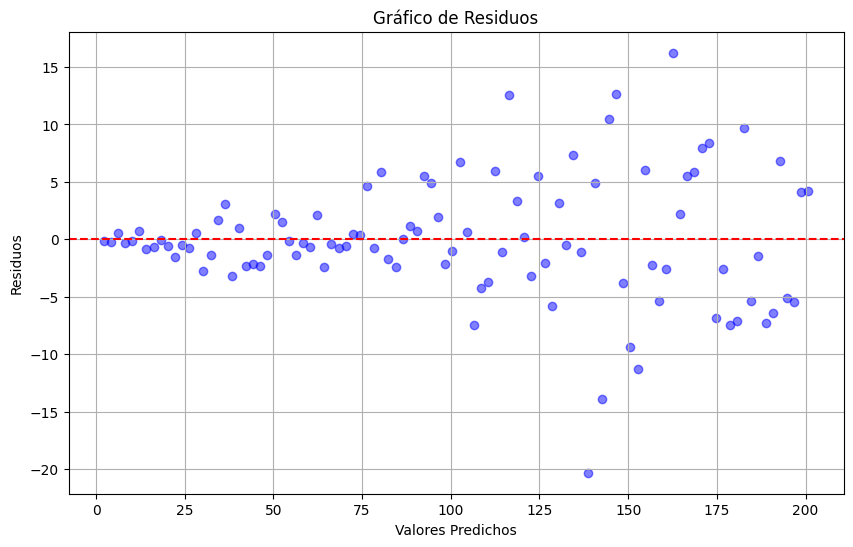

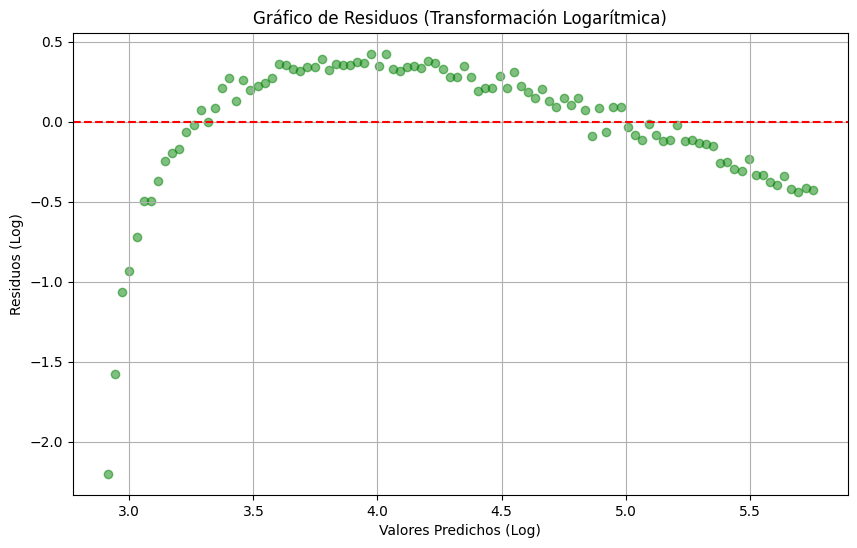

In [10]:
# Generando datos simulados con heteroscedasticidad
np.random.seed(5)
x = np.linspace(1, 100, 100)
y = 2*x + np.random.normal(0, x*0.1, 100)  # Incremento de la varianza con x

# Creando DataFrame
df_hetero = pd.DataFrame({'X': x, 'Y': y})

# Ajustando un modelo de regresión lineal
modelo_hetero = LinearRegression()
modelo_hetero.fit(df_hetero[['X']], df_hetero['Y'])

# Predicciones y residuos
df_hetero['Y_pred'] = modelo_hetero.predict(df_hetero[['X']])
df_hetero['Residuos'] = df_hetero['Y'] - df_hetero['Y_pred']

# Gráfico de residuos
plt.figure(figsize=(10, 6))
plt.scatter(df_hetero['Y_pred'], df_hetero['Residuos'], color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Gráfico de Residuos')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.grid(True)
plt.show()

# Aplicando transformación logarítmica a Y
df_hetero['Y_log'] = np.log(df_hetero['Y'])
modelo_log = LinearRegression()
modelo_log.fit(df_hetero[['X']], df_hetero['Y_log'])
df_hetero['Y_log_pred'] = modelo_log.predict(df_hetero[['X']])
df_hetero['Residuos_log'] = df_hetero['Y_log'] - df_hetero['Y_log_pred']

# Gráfico de residuos después de la transformación logarítmica
plt.figure(figsize=(10, 6))
plt.scatter(df_hetero['Y_log_pred'], df_hetero['Residuos_log'], color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Gráfico de Residuos (Transformación Logarítmica)')
plt.xlabel('Valores Predichos (Log)')
plt.ylabel('Residuos (Log)')
plt.grid(True)
plt.show()

En el primer gráfico de residuos, se puede observar un patrón de expansión en los residuos a medida que aumentan los valores predichos, indicativo de heteroscedasticidad. Esto significa que la varianza de los errores aumenta con el valor de $(X)$, lo que viola las suposiciones de homoscedasticidad de los modelos de regresión lineal.

Para abordar este problema, aplicamos una transformación logarítmica a la variable dependiente $(Y)$, y ajustamos nuevamente un modelo de regresión. El segundo gráfico muestra los residuos después de aplicar la transformación logarítmica. Aunque puede que no sea perfectamente homoscedástico, este ajuste muestra una mejora considerable en la uniformidad de la varianza de los residuos en comparación con el modelo original. Los residuos parecen estar más uniformemente distribuidos alrededor de la línea horizontal $(y=0)$, sin el patrón claro de expansión presente antes de la transformación.

Estos ejemplos ilustran cómo los gráficos de residuos pueden ser herramientas valiosas para diagnosticar problemas en el ajuste de modelos de regresión, como la heteroscedasticidad, y cómo las transformaciones pueden ayudar a resolver estos problemas, mejorando potencialmente la calidad y la interpretación del modelo.

## **4.9 Valores atípicos y puntos influyentes**

Los **valores atípicos** son observaciones en un conjunto de datos que se desvían notablemente de las otras observaciones. Pueden ser resultado de variabilidad en la medición o indicar un error experimental; en algunos casos, pueden ser simplemente variaciones naturales. Los valores atípicos pueden afectar significativamente los resultados de análisis estadísticos, como el promedio de un conjunto de datos o el ajuste de un modelo de regresión.

Los **puntos influyentes** son un subconjunto de valores atípicos que no solo son diferentes de las demás observaciones, sino que también ejercen una influencia desproporcionada sobre el modelo de regresión. Es decir, su presencia o ausencia puede cambiar significativamente el ajuste del modelo. Un punto puede ser un valor atípico en el eje $(y)$ (en términos de la variable dependiente) pero no necesariamente un punto influyente; sin embargo, un punto que es atípico tanto en $(x)$ como en $(y)$ es más probable que sea influyente.

**Detección de Valores Atípicos y Puntos Influyentes**

Una forma común de detectar valores atípicos es utilizando los **scores de distancia de Cook**, que miden la influencia de cada observación en las estimaciones de los coeficientes de un modelo de regresión. Los puntos con un score de Cook más alto que un cierto umbral (por ejemplo, $4/(n-k-1)$, donde $(n)$ es el número de observaciones y $(k)$ es el número de predictores) se consideran influyentes.

**Ejemplo con Datos Simulados**

Generaremos un conjunto de datos que incluya tanto valores atípicos como puntos influyentes. Ajustaremos un modelo de regresión lineal a estos datos y utilizaremos gráficos para visualizar cómo estos puntos afectan el modelo.

Crearemos un DataFrame para este propósito y utilizaremos gráficos para identificar visualmente valores atípicos y puntos influyentes.

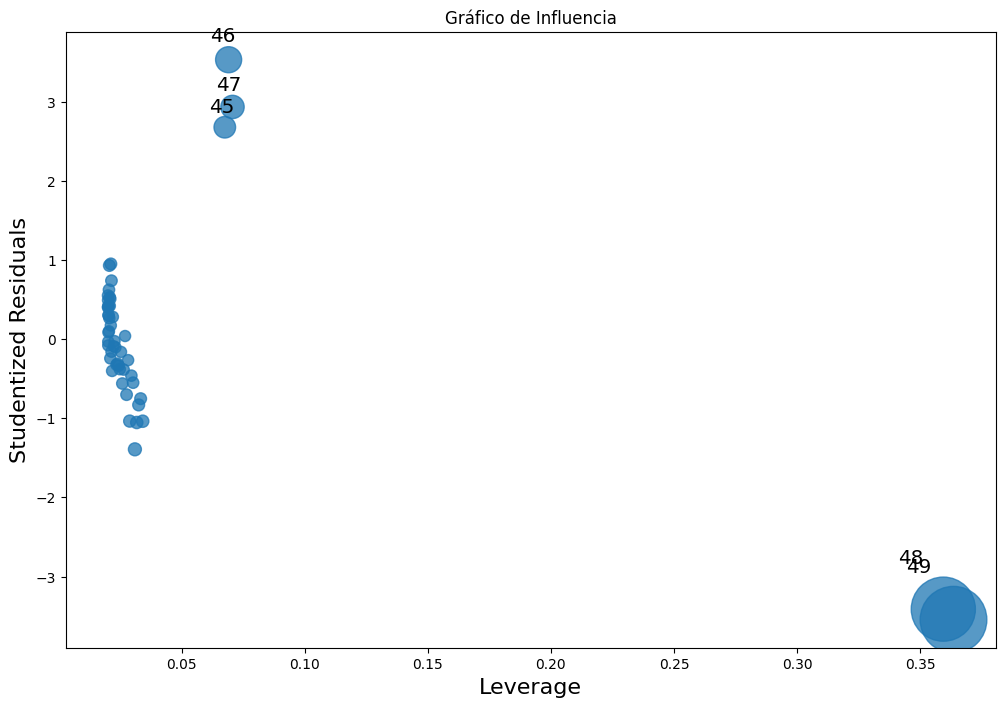

In [11]:
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.api as sm

# Generando datos simulados
np.random.seed(6)
x = np.linspace(1, 50, 50)
y = 2*x + np.random.normal(10, 10, 50)

# Añadiendo valores atípicos
x[45:] += 50
y[45:] += 100

# Añadiendo puntos influyentes
x[48:] += 100
y[48:] -= 200

# Creando DataFrame
df_outliers = pd.DataFrame({'X': x, 'Y': y})

# Ajustando un modelo de regresión lineal usando OLS
X_sm = sm.add_constant(df_outliers['X'])  # Añadiendo una constante
modelo = sm.OLS(df_outliers['Y'], X_sm).fit()

# Creando un gráfico de influencia para identificar valores atípicos y puntos influyentes
fig, ax = plt.subplots(figsize=(12, 8))
influence_plot(modelo, ax=ax, criterion="cooks")
plt.title('Gráfico de Influencia')
plt.show()

# Notas sobre la interpretación del gráfico
# - El tamaño de los puntos representa la influencia de las observaciones.
# - Observaciones lejos del centro indican valores atípicos en X o Y.
# - Puntos con distancias de Cook grandes (más allá del umbral) son considerados influyentes.

El gráfico de influencia muestra la presencia de valores atípicos y puntos influyentes en nuestro conjunto de datos simulado. Aquí, cada punto representa una observación del conjunto de datos, y su tamaño indica la influencia de esa observación en el ajuste del modelo de regresión:

- La mayoría de las observaciones se agrupan cerca del origen, lo que indica que tienen una influencia relativamente baja en el modelo.
- Unas pocas observaciones, especialmente aquellas más alejadas del centro del gráfico, destacan como valores atípicos o puntos influyentes. Estos son principalmente los datos que añadimos artificialmente para ser atípicos o influyentes.
- Las observaciones con tamaños de punto más grandes y más alejadas en el gráfico son consideradas puntos influyentes porque tienen una distancia de Cook significativamente mayor, lo que indica que están teniendo un impacto desproporcionado en la pendiente y el intercepto del modelo de regresión.

Este ejemplo ilustra cómo los gráficos de influencia pueden ser herramientas útiles para detectar valores atípicos y puntos influyentes en el análisis de regresión. Identificar y manejar adecuadamente estos puntos es crucial para mejorar la precisión y la fiabilidad de los modelos de regresión estadística.

| **Inicio** | **atrás 3** | **Siguiente 5** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./03_Probabilidad.ipynb)| [⏩](./05_Intervalos_de_Confianza.ipynb)|